# WeatherPy
----

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

while len(cities) < 500:
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [55]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | wum
Processing Record 2 | anadyr
Processing Record 3 | arraial do cabo
Processing Record 4 | tiksi
City not found. Skipping...
Processing Record 6 | cape town
Processing Record 7 | umm lajj
Processing Record 8 | busselton
Processing Record 9 | koson
Processing Record 10 | arica
Processing Record 11 | bitung
Processing Record 12 | bredasdorp
Processing Record 13 | tuktoyaktuk
Processing Record 14 | georgetown
Processing Record 15 | pozo colorado
Processing Record 16 | viedma
Processing Record 17 | irece
Processing Record 18 | buala
Processing Record 19 | volzhskiy
Processing Record 20 | mataura
Processing Record 21 | alihe
Processing Record 22 | sobolevo
Processing Record 23 | misratah
Processing Record 24 | lavrentiya
Processing Record 25 | saint-philippe
Processing Record 26 | manaure
Processing Record 27 | ushuaia
Processing Record 28 | yellowknife
Processing Record 29 | posse
Processing Record 30 | cidreir

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

for resp in responses:
    city_list.append(resp['name'])
    cloudiness_list.append(resp['clouds']['all'])
    country_list.append(resp['sys']['country'])
    date_list.append(resp['dt'])
    humidity_list.append(resp['main']['humidity'])
    lat_list.append(resp['coord']['lat'])
    lng_list.append(resp['coord']['lon'])
    max_temp_list.append(resp['main']['temp_max'])
    wind_speed_list.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Wum,9,CM,1578107243,36,6.39,10.08,60.78,3.29
1,Anadyr,0,RU,1578107243,66,64.73,177.51,-31.00,4.47
2,Arraial do Cabo,60,BR,1578107204,90,-22.97,-42.02,75.58,16.93
3,Tiksi,100,RU,1578107244,85,71.64,128.87,-17.55,8.41
4,Cape Town,19,ZA,1578106969,88,-33.93,18.42,66.00,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

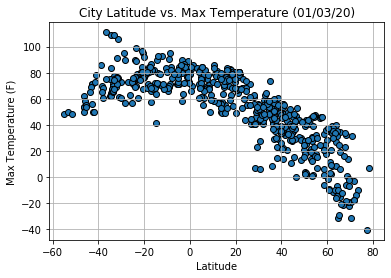

In [63]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (01/03/20)')
plt.savefig('output_data/CityLatitudeVsMaxTemp.png')

In [69]:
# This plot shows that the temperature is typically higher in the Southern Hemisphere, particularly as we approach just below the equator. This makes sense since it is Summer in the Southern Hemisphere and Winter in the Northern Hemisphere in January.


#### Latitude vs. Humidity Plot

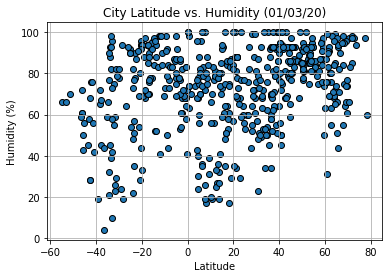

In [70]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (01/03/20)')
plt.savefig('output_data/CityLatitudeVsHumidity.png')

In [ ]:
# This shows that the humidity is dropping slightly lower in the Southern Hemisphere right now.

#### Latitude vs. Cloudiness Plot

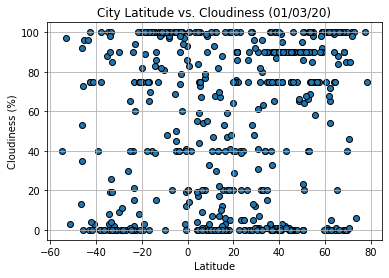

In [65]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (01/03/20)')
plt.savefig('output_data/CityLatitudeVsCloudiness.png')

In [71]:
# This shows that the cloudiness is not affected much by the Earth's latitude.

#### Latitude vs. Wind Speed Plot

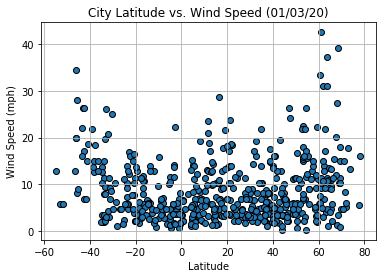

In [66]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (01/03/20)')
plt.savefig('output_data/CityLatitudeVsWindSpeed.png')

In [72]:
# This shows that the wind speed is typically higher near the lowest and highest latitudes (further away from the equator).

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames
#northern_hemisphere_df = city_data_df.loc[]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


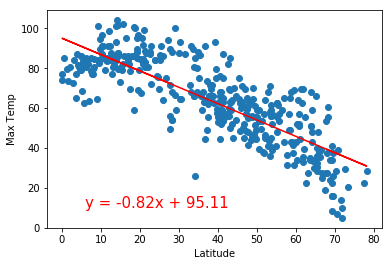

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


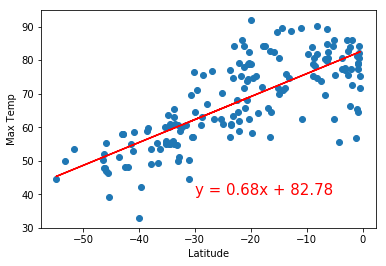

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


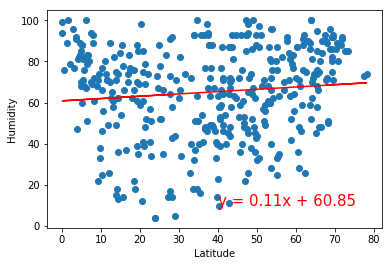

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


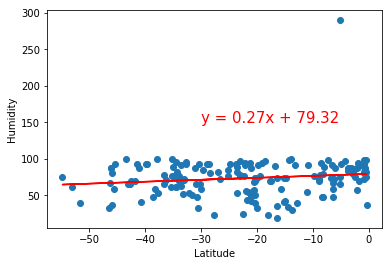

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


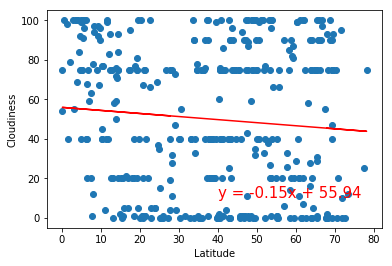

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


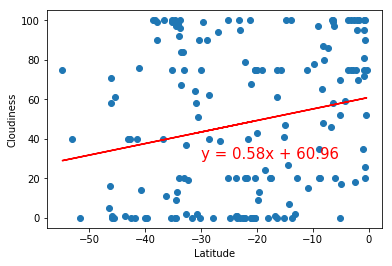

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


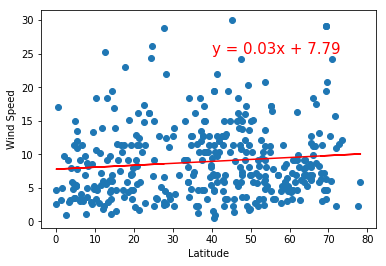

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


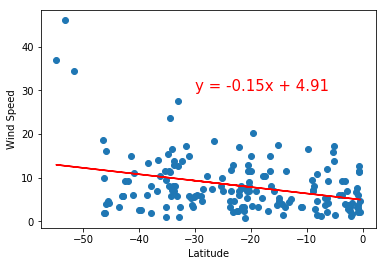